# EDA AND EXPERIMENTS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [5]:
df = pd.read_csv('/Users/kunalkoshta/Desktop/MLOps/MLOps-Vehicle-Insurance/notebooks/data.csv')

In [6]:
df.drop(columns=['id'],inplace=True)

In [7]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [9]:
df_1=df[df['Response']==1]

In [10]:
df_1.shape[0]

46710

In [11]:
df_0=df[df['Response']==0].iloc[:df_1.shape[0]+10000]

In [12]:
df = pd.concat([df_0,df_1],ignore_index=True)

In [13]:
df=df.sample(df.shape[0])

In [14]:
df.shape

(103420, 11)

**GENDER**: Gender of a person(male/female)(object)

**AGE**: Age of a person(int)

**DRIVING_LICENSE**: Person have dl or not (Yes->1, No->0)(int)

**REGION_CODE**: Region code of city(float)

**PREVIOUSLY_INSURED**: Past insured or not(same as dl)

**VEHICLE_AGE**: Age of your vehicle(3 values)(object)

**VEHICLE_DAMAGE**: Vehicle is damaged or not(same as dl)

**ANNUAL_PREMIUM**: Amount of Insurance(int)

**VINTAGE**: How many days you don't have insurance(int)

**RESPONSE**: Target column whether person buys insurance or not(Yes->1, No->0)  

# EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103420 entries, 64088 to 21811
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                103420 non-null  object 
 1   Age                   103420 non-null  int64  
 2   Driving_License       103420 non-null  int64  
 3   Region_Code           103420 non-null  float64
 4   Previously_Insured    103420 non-null  int64  
 5   Vehicle_Age           103420 non-null  object 
 6   Vehicle_Damage        103420 non-null  object 
 7   Annual_Premium        103420 non-null  float64
 8   Policy_Sales_Channel  103420 non-null  float64
 9   Vintage               103420 non-null  int64  
 10  Response              103420 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 9.5+ MB


In [16]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,103420.000000,103420.000000,103420.000000,103420.000000,103420.000000,103420.000000,103420.000000,103420.000000
mean,40.520557,0.998347,26.547389,0.287749,30909.856730,104.732218,154.208267,0.451653
std,14.535274,0.040629,12.708341,0.452716,17608.415147,55.673667,83.736400,0.497660
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,27.000000,1.000000,15.000000,0.000000,24527.000000,26.000000,82.000000,0.000000
50%,40.000000,1.000000,28.000000,0.000000,32152.000000,124.000000,154.000000,0.000000
75%,50.000000,1.000000,35.000000,1.000000,40214.000000,152.000000,227.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [17]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No NULL Values

In [18]:
temp = df['Response'].value_counts()
temp

Response
0    56710
1    46710
Name: count, dtype: int64

Data is sparse

As there are yes are about 46000 and rest are No

Text(0.5, 1.0, 'Distribution of Responses')

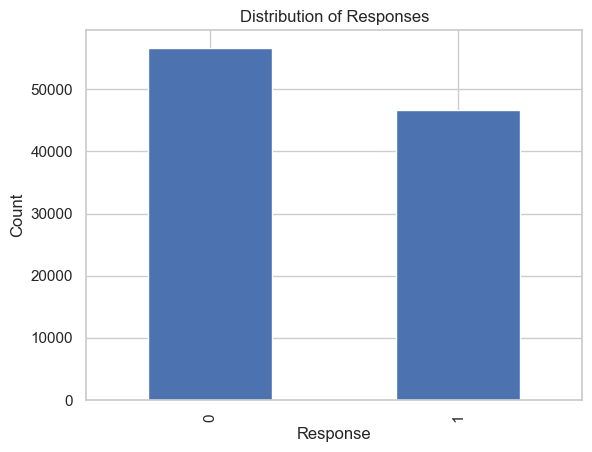

In [19]:
temp.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses')

<Axes: xlabel='Driving_License'>

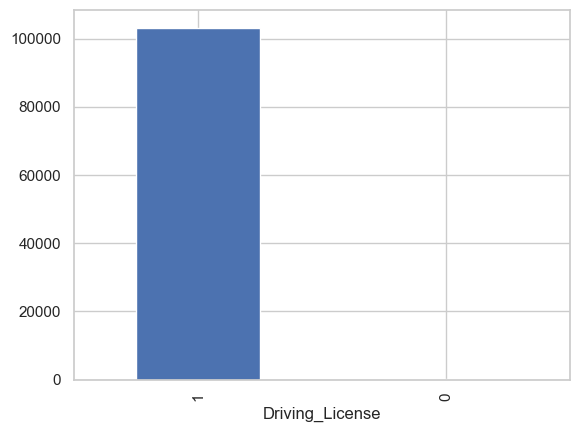

In [20]:
df['Driving_License'].value_counts().plot(kind='bar')

Everybody owns Driving License

<Axes: xlabel='Previously_Insured'>

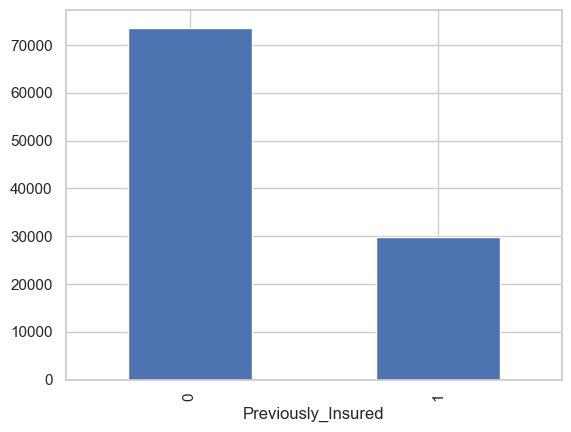

In [21]:
df['Previously_Insured'].value_counts().plot(kind='bar')

<Axes: xlabel='Vehicle_Damage'>

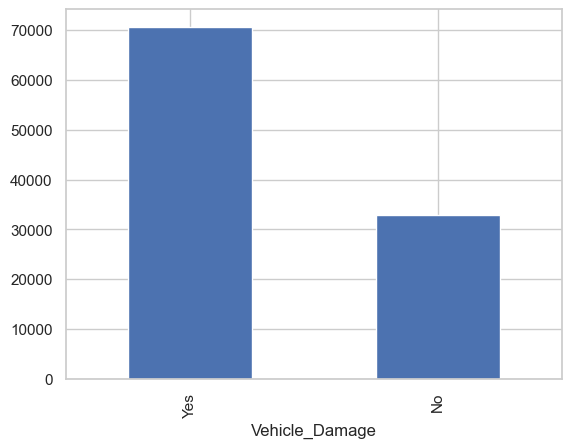

In [22]:
df['Vehicle_Damage'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

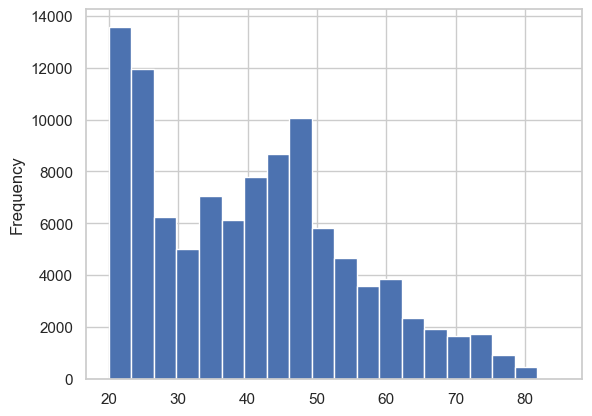

In [23]:
df['Age'].plot(kind='hist',bins=20)

<Axes: >

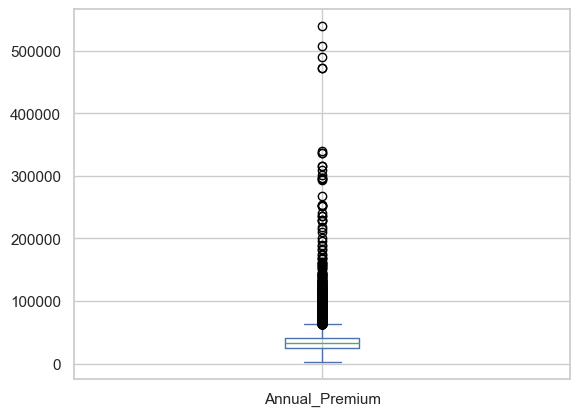

In [24]:
df['Annual_Premium'].plot(kind='box')

In [25]:
df['Annual_Premium'].describe()

count    103420.000000
mean      30909.856730
std       17608.415147
min        2630.000000
25%       24527.000000
50%       32152.000000
75%       40214.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

So much outliers

<Axes: ylabel='Frequency'>

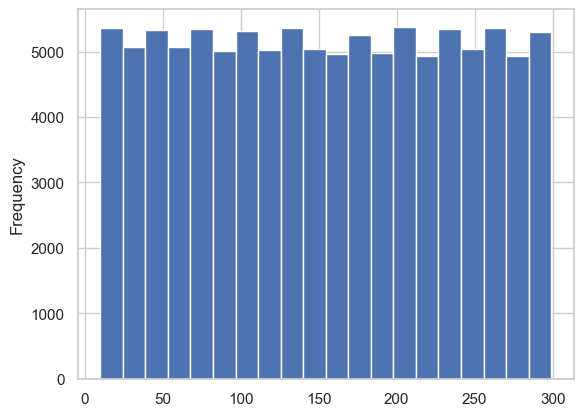

In [26]:
df['Vintage'].plot(kind='hist',bins=20)

# DATA VALIDATION

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103420 entries, 64088 to 21811
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                103420 non-null  object 
 1   Age                   103420 non-null  int64  
 2   Driving_License       103420 non-null  int64  
 3   Region_Code           103420 non-null  float64
 4   Previously_Insured    103420 non-null  int64  
 5   Vehicle_Age           103420 non-null  object 
 6   Vehicle_Damage        103420 non-null  object 
 7   Annual_Premium        103420 non-null  float64
 8   Policy_Sales_Channel  103420 non-null  float64
 9   Vintage               103420 non-null  int64  
 10  Response              103420 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 9.5+ MB


In [28]:
df.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
64088,Female,37,1,28.0,0,1-2 Year,Yes,37721.0,158.0,106,1


In [29]:
num_col = ['Age','Vintage']
cat_col = ['Gender','Driving_License','Previously_Insured','Vehicle_Damage','Vehicle_Age_LT_1_Year','Vehicle_Age_GT_2_Years','Vehicle_Damage_Yes']

In [30]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [31]:
df = pd.get_dummies(df,drop_first=True)

In [32]:
df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_LT_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_GT_2_Years"})

In [33]:
df.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_LT_1_Year,Vehicle_Age_GT_2_Years,Vehicle_Damage_Yes
64088,0,37,1,28.0,0,37721.0,158.0,106,1,False,False,True


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103420 entries, 64088 to 21811
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  103420 non-null  int64  
 1   Age                     103420 non-null  int64  
 2   Driving_License         103420 non-null  int64  
 3   Region_Code             103420 non-null  float64
 4   Previously_Insured      103420 non-null  int64  
 5   Annual_Premium          103420 non-null  float64
 6   Policy_Sales_Channel    103420 non-null  float64
 7   Vintage                 103420 non-null  int64  
 8   Response                103420 non-null  int64  
 9   Vehicle_Age_LT_1_Year   103420 non-null  bool   
 10  Vehicle_Age_GT_2_Years  103420 non-null  bool   
 11  Vehicle_Damage_Yes      103420 non-null  bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 8.2 MB


In [35]:
df.dropna(inplace=True)

In [36]:
df['Vehicle_Age_LT_1_Year'] = df['Vehicle_Age_LT_1_Year'].astype(int)
df['Vehicle_Age_GT_2_Years'] = df['Vehicle_Age_GT_2_Years'].astype(int)
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype(int)

In [37]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_LT_1_Year,Vehicle_Age_GT_2_Years,Vehicle_Damage_Yes
64088,0,37,1,28.0,0,37721.0,158.0,106,1,0,0,1
9635,1,69,1,28.0,0,38974.0,122.0,271,0,0,0,0
75673,0,35,1,28.0,0,47163.0,124.0,58,1,0,0,1
81439,1,36,1,38.0,0,35028.0,26.0,114,1,0,0,1
54514,1,22,1,30.0,1,29369.0,152.0,124,0,1,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103420 entries, 64088 to 21811
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  103420 non-null  int64  
 1   Age                     103420 non-null  int64  
 2   Driving_License         103420 non-null  int64  
 3   Region_Code             103420 non-null  float64
 4   Previously_Insured      103420 non-null  int64  
 5   Annual_Premium          103420 non-null  float64
 6   Policy_Sales_Channel    103420 non-null  float64
 7   Vintage                 103420 non-null  int64  
 8   Response                103420 non-null  int64  
 9   Vehicle_Age_LT_1_Year   103420 non-null  int64  
 10  Vehicle_Age_GT_2_Years  103420 non-null  int64  
 11  Vehicle_Damage_Yes      103420 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 10.3 MB


In [39]:
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)
df['Region_Code'] = df['Region_Code'].astype(int)

In [40]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df[num_col] = ss.fit_transform(df[num_col])
df[['Annual_Premium']] = ss.fit_transform(df[['Annual_Premium']])

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Response'],axis=1)
y = df['Response']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=12)

In [42]:
X_test.shape

(20684, 11)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [44]:


# random_search = {'criterion':['entropy','gini'],
#                  'max_depth':[2,4,6,8,10],
#                  'min_samples_leaf':[2,4,6],
#                  'min_samples_split':[3,5,7],
#                  'n_estimators':[200,300]}

# clf = RandomForestClassifier()

# model = RandomizedSearchCV(estimator = clf,
#                            param_distributions=random_search,
#                            n_iter=5,
#                            cv=3,
#                            verbose=1,
#                            random_state=2,
#                            n_jobs=-1)
# model.fit(X_train,y_train)

In [45]:
# best_params=model.best_params_

NameError: name 'model' is not defined

In [46]:
my_params = {'n_estimators': [300], 'min_samples_split': [7], 'min_samples_leaf': [6], 'max_depth': [10], 'criterion': ['entropy']}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = my_params, n_iter = 5,
                               cv = 3, verbose= 1, random_state= 2, n_jobs = -1)

model.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [10],
                                        'min_samples_leaf': [6],
                                        'min_samples_split': [7],
                                        'n_estimators': [300]},
                   random_state=2, verbose=1)

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7862115644942951
              precision    recall  f1-score   support

           0       0.90      0.68      0.78     11286
           1       0.71      0.91      0.79      9398

    accuracy                           0.79     20684
   macro avg       0.80      0.80      0.79     20684
weighted avg       0.81      0.79      0.79     20684

